## Корни и минимум полинома

In [1]:
from IPython.display import Math

In [2]:
def get_coef(coef):
    if coef < 0:
        sign = -1
        coef = -coef
    elif coef > 0:
        sign = 1
        coef = coef
    else:
        sign = 0

    if coef == 1:
        num = False
    else:
        num = True

    return coef, sign, num

class Polynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients

    def degree(self):
        return len(self.coefficients) - 1

    def evaluate(self, x):
        y = 1
        result = 0
        for coef in self.coefficients:
            result += y * coef
            y *= x
        return result

    def __call__(self, x):
        return self.evaluate(x)

    def derivative(self):
        return Polynomial([(i + 1) * coef for i, coef in enumerate(self.coefficients[1:])])

    def __str__(self):
        res = str(self.coefficients[0])
        if len(self.coefficients) == 1:
            return res

        for i in range(1, len(self.coefficients)):
            coef, sign, num = get_coef(self.coefficients[i])
            if sign == 0:
                continue
            res += ("-" if sign < 0 else "+") +  (str(coef) if num else "") + (f"x^{{{i}}}" if i > 1 else "x")
        return res

    def as_latex(self):
        return Math(str(self))

In [3]:
p = Polynomial([1, 2, -1])
print(p, p.derivative())

1+2x-x^{2} 2-2x


In [4]:
from typing import Callable

def bisection_single_root(g: Callable[[float], float],
                          left: float,
                          right: float,
                          eps: float):
    while right - left > eps:
        mid = (left + right) / 2
        if abs(g(mid)) < eps:
            return mid
        if g(left) * g(mid) < 0:
            right = mid
        else:
            left = mid
    return mid

def find_roots(p: Polynomial, left: float, right: float, eps=1e-9, delta=1e-6):
    if p.degree() == 0:
        return None
    if p.degree() == 1:
        if p.coefficients[-1] == 0:
            return None
        return [-p.coefficients[0] / p.coefficients[1]], []

    derivative_roots, derivative_milestones = find_roots(p.derivative(), left, right)

    milestones = []
    if len(derivative_roots) == 0:
        milestones = [left, right]
        print("No derivative roots")
    elif left + eps < derivative_roots[0]:
        milestones = [left, *derivative_roots]

    if right - eps > milestones[-1]:
        milestones.append(right)

    roots = []
    for i, border in enumerate(milestones[:-1]):
        if abs(p.evaluate(border)) < delta:
            roots.append(border)
        elif abs(p.evaluate(milestones[i + 1])) > delta:
            if p.evaluate(border) * p.evaluate(milestones[i + 1]) < 0:
                roots.append(bisection_single_root(p.evaluate, border, milestones[i + 1], eps))

    if abs(p.evaluate(milestones[-1])) < delta:
        roots.append(milestones[-1])
    return roots, milestones

In [5]:
roots = find_roots(p, -4, 4)

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7, 7]

In [7]:
import numpy as np

In [8]:
def show_roots(p: Polynomial, left: float, right: float, eps=1e-9, delta=1e-6):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    roots, milestones = find_roots(p, left, right, eps, delta)
    r = np.arange(left, right + (right - left) * 0.001, (right - left) * 0.001)
    mn, mx = min([p(x) for x in r]), max([p(x) for x in r])
    q = np.arange(mn, mx + (mx - mn) * 0.001, (mx - mn) * 0.001)
    ax.plot(r, [p(x) for x in r], color='blue')
    ax.scatter(roots, [0 for _ in roots], color='black')
    ax.plot(r, [0 for _ in r], color='grey', linestyle='--')
    for border in milestones:
        ax.plot([border for _ in q], q, linestyle='--', color='green')
    plt.close(fig)
    return fig

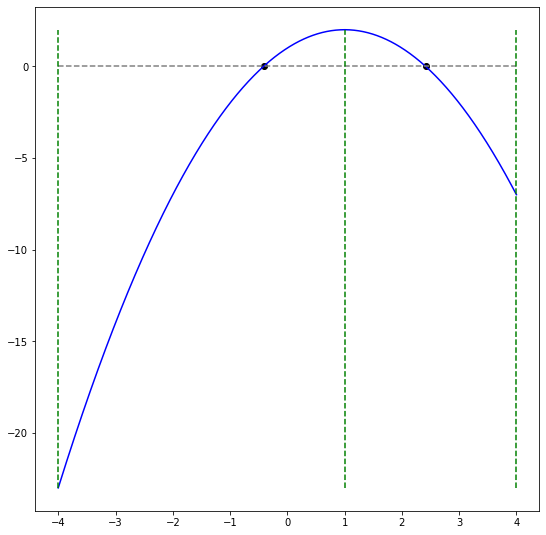

In [9]:
p = Polynomial([1, 2, -1])
show_roots(p, -4, 4)

2-3x+x^{3}
-3+3x^{2}


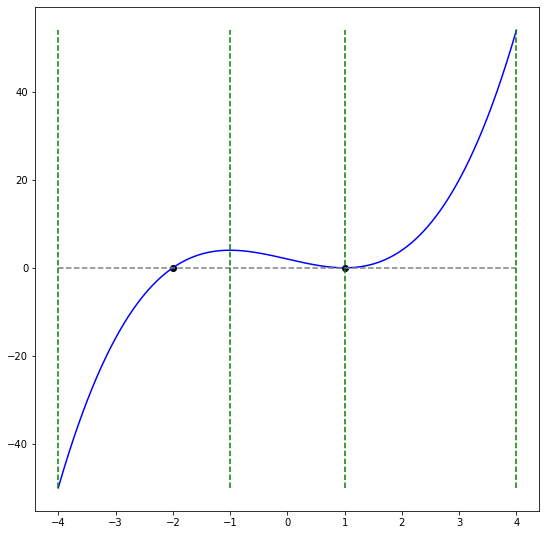

In [10]:
cubic = Polynomial([2, -3, 0, 1])
print(cubic)
print(cubic.derivative())
show_roots(cubic, -4, 4)

1-3x+x^{3}
-3+3x^{2}


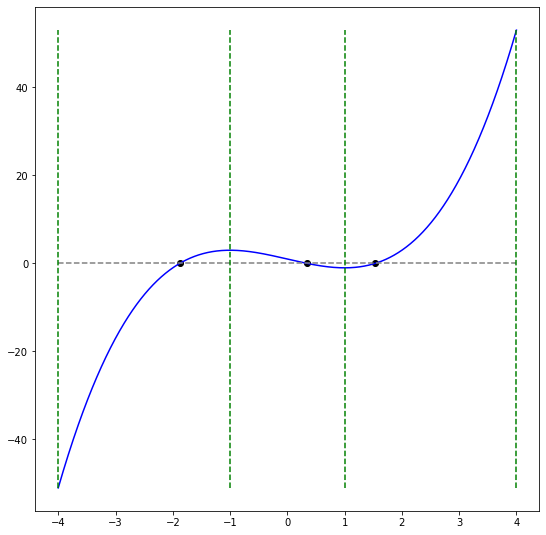

In [11]:
cubic = Polynomial([1, -3, 0, 1])
print(cubic)
print(cubic.derivative())
show_roots(cubic, -4, 4)

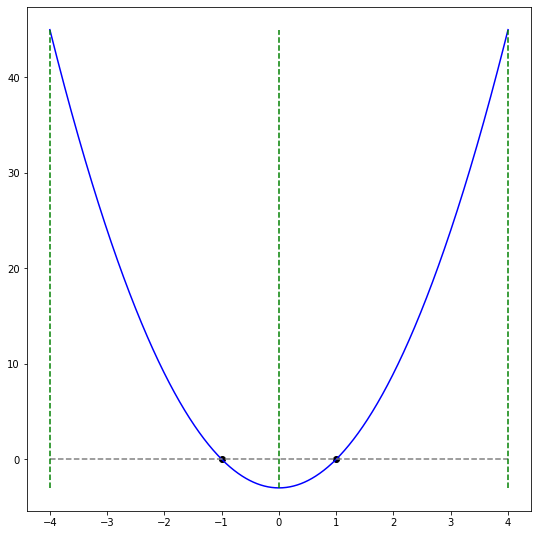

In [12]:
show_roots(cubic.derivative(), -4, 4)

-1+2x^{2}
0-3x+4x^{3}
1-8x^{2}+8x^{4}
0+5x-20x^{3}+16x^{5}
-1+18x^{2}-48x^{4}+32x^{6}
0-7x+56x^{3}-112x^{5}+64x^{7}
1-32x^{2}+160x^{4}-256x^{6}+128x^{8}
0+9x-120x^{3}+432x^{5}-576x^{7}+256x^{9}
-1+50x^{2}-400x^{4}+1120x^{6}-1280x^{8}+512x^{10}
0-11x+220x^{3}-1232x^{5}+2816x^{7}-2816x^{9}+1024x^{11}


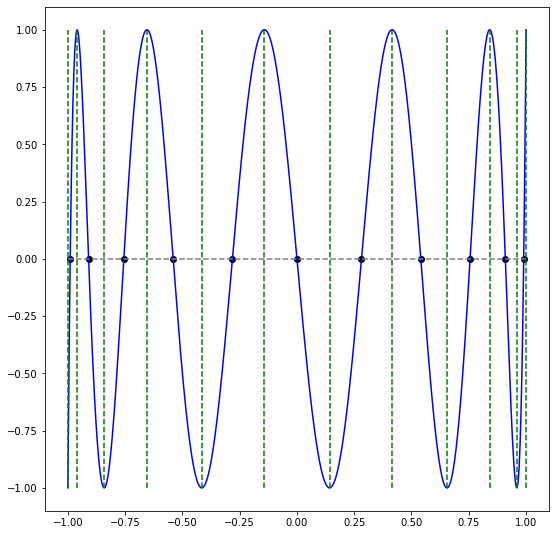

In [13]:
cheb = []
cheb.append(Polynomial([1]))
cheb.append(Polynomial([0, 1]))
for i in range(10):
    new_coef = [0]
    for coef in cheb[-1].coefficients:
        new_coef.append(2 * coef)
    for i, x in enumerate(cheb[-2].coefficients):
        new_coef[i] -= x
    cheb.append(Polynomial(new_coef))
    print(cheb[-1])
             
show_roots(cheb[-1], -1, 1)

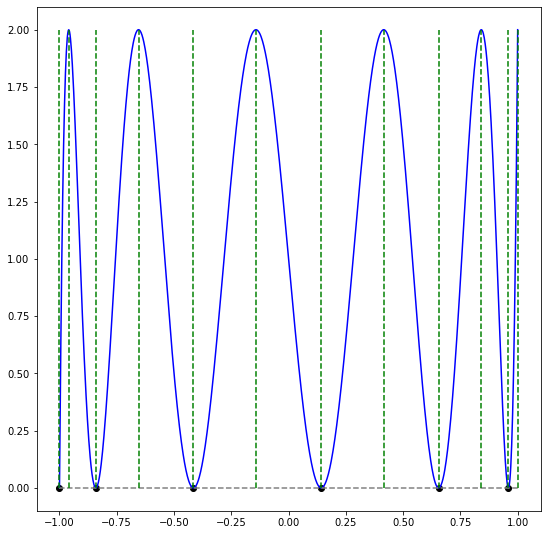

In [14]:
cheb[-1].as_latex()
cheb[-1].coefficients[0] = 1
show_roots(cheb[-1], -1, 1)

In [15]:
def find_min(p: Polynomial, left: float, right: float, eps=1e-9, delta=1e-6):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    roots, milestones = find_roots(p, left, right, eps, delta)
    r = np.arange(left, right + (right - left) * 0.001, (right - left) * 0.001)
    mn, mx = min([p(x) for x in r]), max([p(x) for x in r])
    q = np.arange(mn, mx + (mx - mn) * 0.001, (mx - mn) * 0.001)
    ax.plot(r, [p(x) for x in r], color='blue')
    xmin = min(milestones, key=lambda x: p(x))
    ax.scatter(milestones, [p(x) for x in milestones], color=['red' if x == xmin else 'black' for x in milestones])
    plt.close(fig)
    return fig

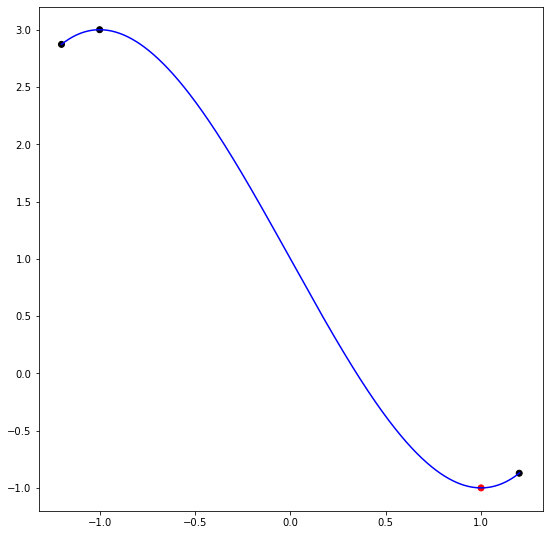

In [16]:
find_min(cubic, -1.2, 1.2)

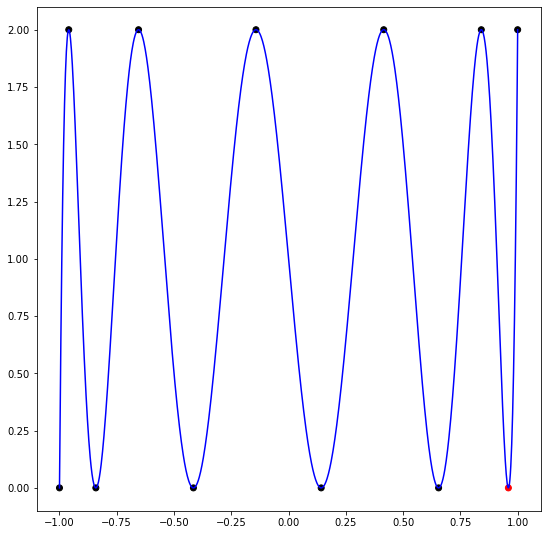

In [17]:
find_min(cheb[-1], -1, 1)

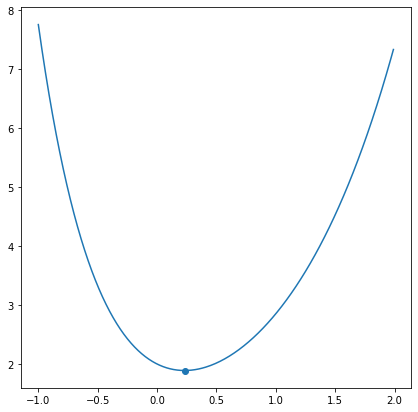

In [18]:
a, b = 1, 2
r = np.arange(-1, 2, 0.01)
f = lambda x: np.exp(a * x) + np.exp(- b * x)
plt.plot(r, [f(x) for x in r])
mx = (np.log(a) - np.log(b)) / (-a - b)
plt.scatter([mx], [f(mx)])
plt.show()